# Active Learning

## Uncertainty Sampling

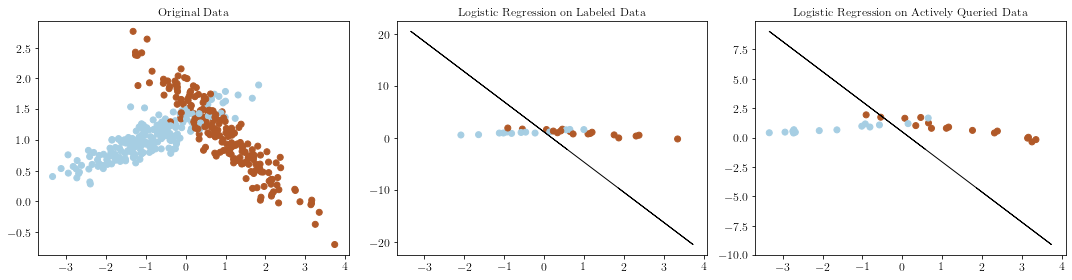

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create synthetic dataset
X, y = make_classification(n_samples=400, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=2)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Plot 1: Original Data
plt.figure(figsize=(15, 4))

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Original Data")

# Train logistic regression model on 30 random instances
num_labeled = 30
X_train_labeled, y_train_labeled = 

# Train and plot logistic regression on labeled instances
clf_labeled = LogisticRegression()
clf_labeled.fit(X_train_labeled, y_train_labeled)

# Plot 2: Logistic Regression on Labeled Data
plt.subplot(132)
plt.scatter(X_train_labeled[:, 0], X_train_labeled[:, 1], c=y_train_labeled, cmap=plt.cm.Paired)
plt.plot(X[:, 0], (-clf_labeled.coef_[0][0] * X[:, 0] - clf_labeled.intercept_) / clf_labeled.coef_[0][1], color='black', linewidth=1)
plt.title("Logistic Regression on Labeled Data")

# Train logistic regression model using uncertainty sampling
num_query = 10
num_init = 20
X_train_labeled, y_train_labeled = X_train.copy(), y_train.copy()
X_train_active, y_train_active = X_train_labeled[:num_init], y_train_labeled[:num_init]


for _ in range(num_query):
    uncertainties = np.abs(clf_labeled.predict_proba(X_train_labeled)[:, 0] - 0.5)
    query_idx = np.argmax(uncertainties)
    X_query = X_train_labeled[query_idx].reshape(1, -1)
    y_query = y_train_labeled[query_idx].reshape(1)
    X_train_active = np.vstack((X_train_active, X_query))
    y_train_active = np.hstack((y_train_active, y_query))
    X_train_labeled = np.delete(X_train_labeled, query_idx, axis=0)
    y_train_labeled = np.delete(y_train_labeled, query_idx)

# Train and plot logistic regression on actively queried instances
clf_active = LogisticRegression()
clf_active.fit(X_train_active, y_train_active)

# Plot 3: Logistic Regression on Actively Queried Data
plt.subplot(133)
plt.scatter(X_train_active[:, 0], X_train_active[:, 1], c=y_train_active, cmap=plt.cm.Paired)
plt.plot(X[:, 0], (-clf_active.coef_[0][0] * X[:, 0] - clf_active.intercept_) / clf_active.coef_[0][1], color='black', linewidth=1)
plt.title("Logistic Regression on Actively Queried Data")

plt.tight_layout()
plt.show()
